In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file = 'resouces/us_state_vaccinations.csv'

In [3]:
df = pd.read_csv(file)
df.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
0,1/12/2021,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207,NaN,NaN
1,1/13/2021,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222,NaN,NaN
2,1/14/2021,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212,NaN,NaN
3,1/15/2021,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226,NaN,NaN
4,1/16/2021,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7498.0,1529.0,NaN,NaN,NaN


In [4]:
rename_df = df.fillna(0)
rename_df.count()

date                                   29500
location                               29500
total_vaccinations                     29500
total_distributed                      29500
people_vaccinated                      29500
people_fully_vaccinated_per_hundred    29500
total_vaccinations_per_hundred         29500
people_fully_vaccinated                29500
people_vaccinated_per_hundred          29500
distributed_per_hundred                29500
daily_vaccinations_raw                 29500
daily_vaccinations                     29500
daily_vaccinations_per_million         29500
share_doses_used                       29500
total_boosters                         29500
total_boosters_per_hundred             29500
dtype: int64

In [5]:
clean_df = rename_df.drop(columns=["people_fully_vaccinated_per_hundred","total_vaccinations_per_hundred",
                                 "total_vaccinations_per_hundred","distributed_per_hundred",
                                 "daily_vaccinations_raw","daily_vaccinations_per_million",
                                 "share_doses_used","total_boosters_per_hundred"])
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29500 entries, 0 to 29499
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           29500 non-null  object 
 1   location                       29500 non-null  object 
 2   total_vaccinations             29500 non-null  float64
 3   total_distributed              29500 non-null  float64
 4   people_vaccinated              29500 non-null  float64
 5   people_fully_vaccinated        29500 non-null  float64
 6   people_vaccinated_per_hundred  29500 non-null  float64
 7   daily_vaccinations             29500 non-null  float64
 8   total_boosters                 29500 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.0+ MB


In [6]:
del clean_df['people_vaccinated_per_hundred']

In [7]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29500 entries, 0 to 29499
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     29500 non-null  object 
 1   location                 29500 non-null  object 
 2   total_vaccinations       29500 non-null  float64
 3   total_distributed        29500 non-null  float64
 4   people_vaccinated        29500 non-null  float64
 5   people_fully_vaccinated  29500 non-null  float64
 6   daily_vaccinations       29500 non-null  float64
 7   total_boosters           29500 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.8+ MB


In [8]:
clean_df['date'] = pd.to_datetime(clean_df['date'])
clean_df['date'].dt.to_period('M')

0        2021-01
1        2021-01
2        2021-01
3        2021-01
4        2021-01
          ...   
29495    2022-08
29496    2022-08
29497    2022-08
29498    2022-08
29499    2022-08
Name: date, Length: 29500, dtype: period[M]

In [34]:
clean_df['yyyy'] = pd.to_datetime(clean_df['date']).dt.year
clean_df['mm'] = pd.to_datetime(clean_df['date']).dt.month
clean_df.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_boosters,yyyy,mm
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,7270.0,0.0,0.0,2021,1
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,9245.0,5906.0,0.0,2021,1
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,0.0,7083.0,0.0,2021,1
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,13488.0,7478.0,0.0,2021,1
4,2021-01-16,Alabama,0.0,0.0,0.0,0.0,7498.0,0.0,2021,1


In [10]:
grouped_df = clean_df.groupby(["location"]).sum()
grouped_df.head(50)

,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_boosters,yyyy,mm
location,,,,,,,,
Alabama,2.050103e+09,3.096275e+09,1.102411e+09,8.686193e+08,6487790.0,1.616416e+08,1192626,3415
Alaska,3.486863e+08,4.650968e+08,1.747004e+08,1.488049e+08,1175576.0,3.021480e+07,1192626,3415
Arizona,3.909716e+09,4.813042e+09,1.928518e+09,1.574541e+09,12826944.0,3.316522e+08,1192626,3415
Arkansas,1.393712e+09,1.945196e+09,7.310158e+08,5.751807e+08,4512158.0,1.185575e+08,1192626,3415
California,1.722770e+10,2.062226e+10,9.090514e+09,7.183818e+09,79019517.0,1.317047e+09,1192626,3415
Colorado,3.490277e+09,4.065819e+09,1.690264e+09,1.453402e+09,11242572.0,3.831443e+08,1192626,3415
Connecticut,2.462680e+09,2.803529e+09,1.234160e+09,1.025431e+09,7900446.0,2.588420e+08,1192626,3415
Delaware,5.747277e+08,7.397073e+08,2.871484e+08,2.339310e+08,1903686.0,5.382250e+07,1192626,3415
Florida,1.223863e+10,1.539403e+10,6.160579e+09,5.058354e+09,38804591.0,1.042808e+09,1192626,3415


#Creating a dataframe (using columns location, month?, people_vaccinated, people_fully_vaccinated, total_boosters from “us_state_vaccinations.csv”) to compare the mount of people who are fully vaccinated, partially vaccinated(at least one dose), and people who have gotten the booster shot. (multi-line/multi-bar graph)

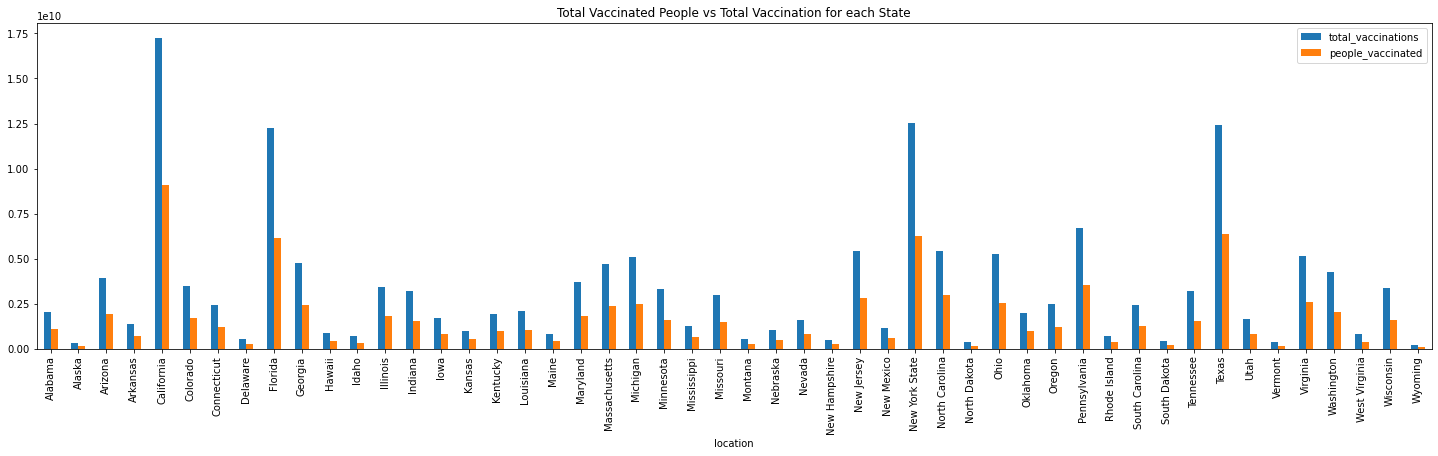

In [29]:
grouped_df[['total_vaccinations','people_vaccinated']].plot(kind="bar",title = "Total Vaccinated People vs Total Vaccination for each State", rot = 90, figsize = (25,6) )
plt.xticks(range(0,len(grouped_df.index)), grouped_df.index)
plt.show()


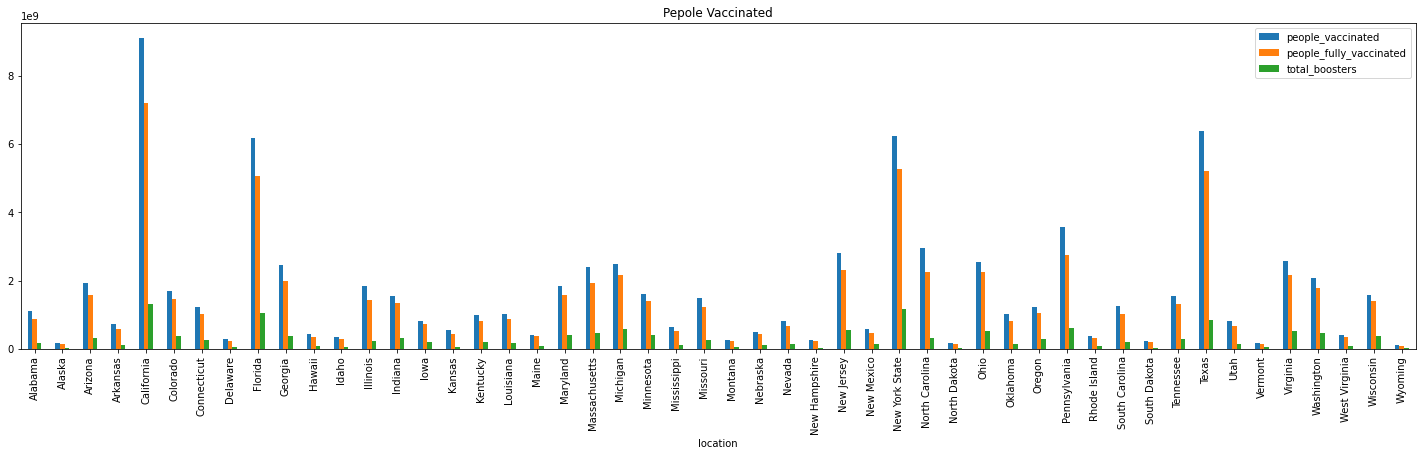

In [32]:
grouped_df[['people_vaccinated','people_fully_vaccinated','total_boosters']].plot(kind="bar",title = "Pepole Vaccinated", rot = 90, figsize = (25,6) )
plt.xticks(range(0,len(grouped_df.index)), grouped_df.index)
plt.show()

In [35]:
file = 'resouces/vaccinations-by-manufacturer.csv'

In [40]:
us_df = pd.read_csv(file)
us_df.head(200)

,location,date,vaccine,total_vaccinations
0,United States,1/12/2021,Moderna,3835859
1,United States,1/12/2021,Pfizer/BioNTech,5488697
2,United States,1/13/2021,Moderna,4249795
3,United States,1/13/2021,Pfizer/BioNTech,6025872
4,United States,1/15/2021,Moderna,5122662
...,...,...,...,...
195,United States,4/8/2021,Pfizer/BioNTech,90256586
196,United States,4/9/2021,Johnson&Johnson,5382365
197,United States,4/9/2021,Moderna,80944104
198,United States,4/9/2021,Pfizer/BioNTech,92355733
